In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import sys
sys.path.append('/content/drive/MyDrive/modeling/regression_bit_ep/train_infer/')

In [18]:
# from preprocess import *
import xgboost as xgb
from sklearn.model_selection import KFold

from sklearn.ensemble import RandomForestRegressor


import os, time, json, copy, pickle
import pandas as pd
import numpy as np
from multiprocessing import Pool
from random import shuffle
from stat_ import *
import matplotlib.pyplot as plt

(855, 26)
Testing ... b18_1
R:  0.752
MAPE:  9
RRSE:  0.675
MAE:  0.046


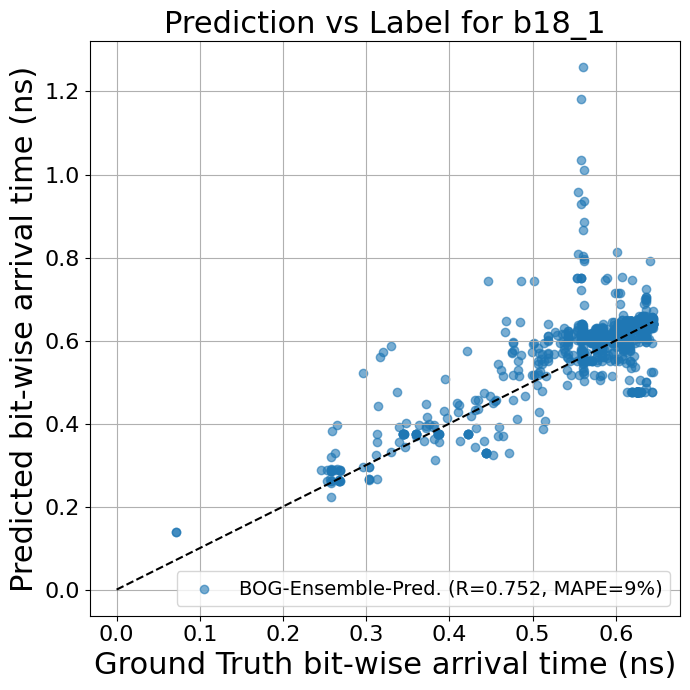

(613, 26)
Testing ... b22
R:  0.919
MAPE:  6
RRSE:  0.447
MAE:  0.052


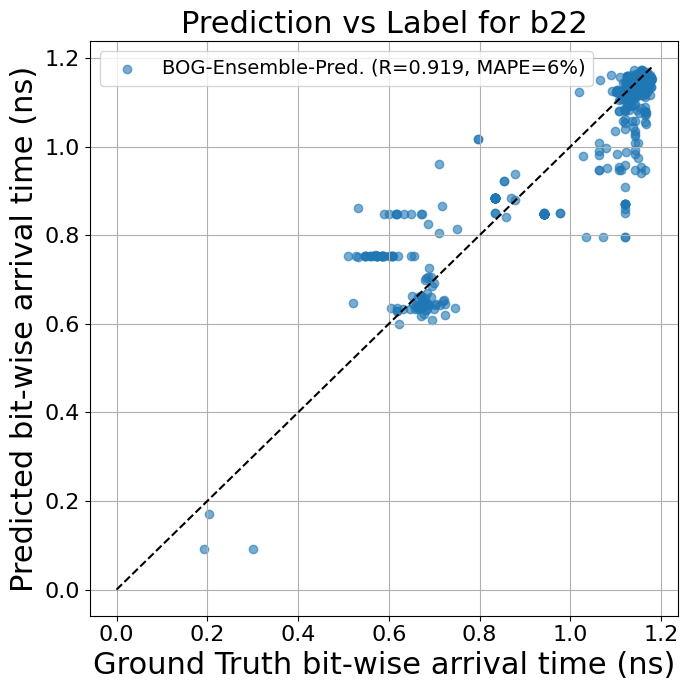

(670, 26)
Testing ... systemcaes
R:  0.237
MAPE:  30
RRSE:  1.468
MAE:  0.218


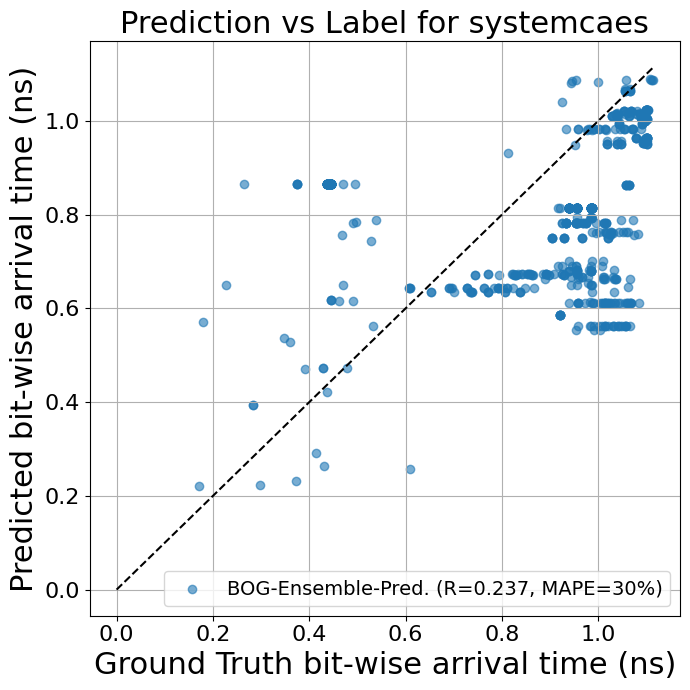

(529, 26)
Testing ... aes_core
R:  0.779
MAPE:  21
RRSE:  0.865
MAE:  0.161


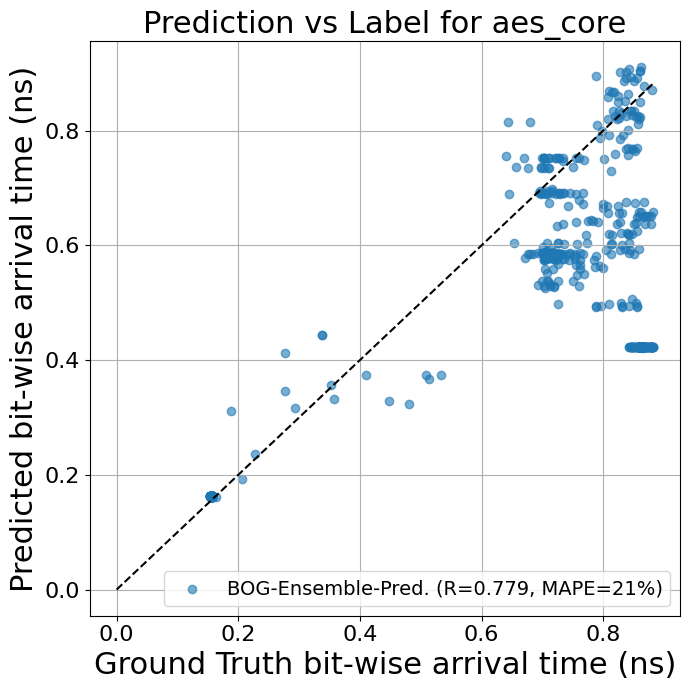

(1310, 26)
Testing ... VexRiscvThreeStages
R:  0.762
MAPE:  9
RRSE:  0.666
MAE:  0.072


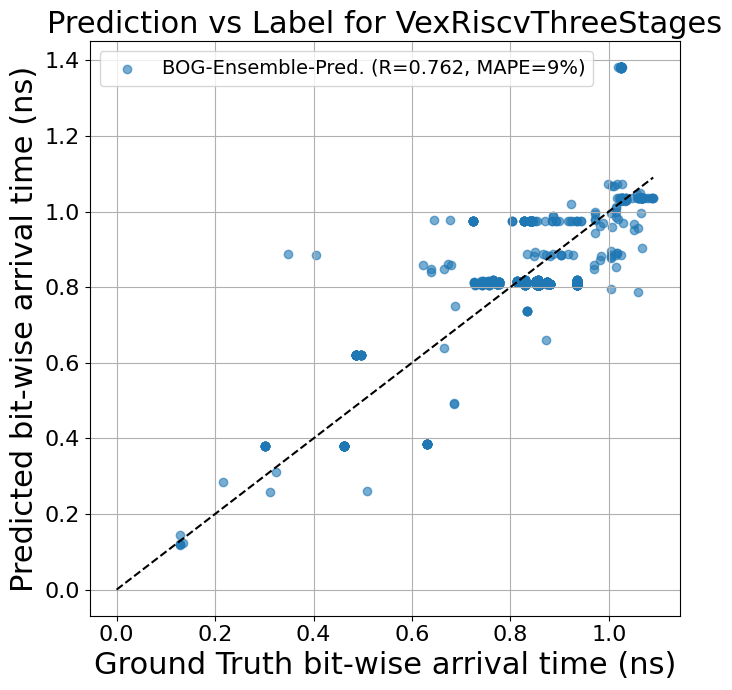

(1605, 26)
Testing ... VexRiscvSmallest
R:  0.768
MAPE:  13
RRSE:  0.664
MAE:  0.082


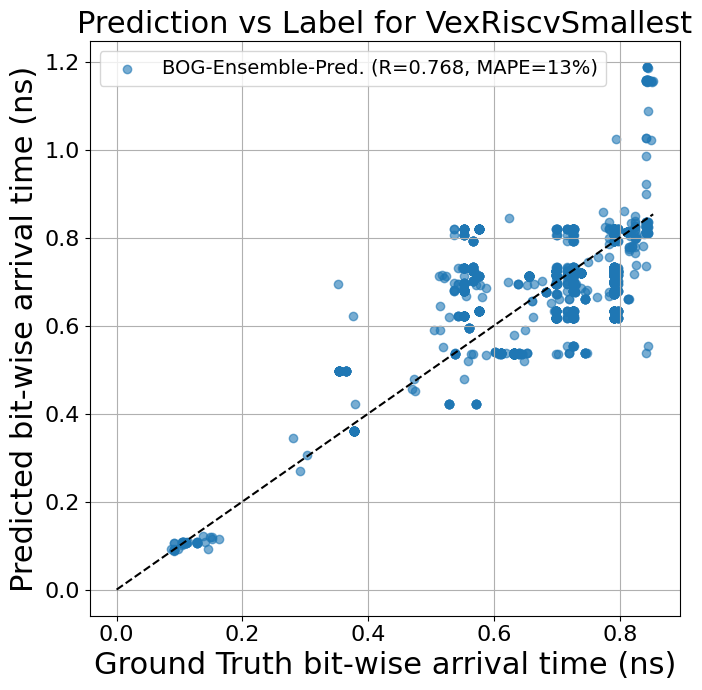

(2269, 26)
Testing ... TinyRocket
R:  0.622
MAPE:  26
RRSE:  1.004
MAE:  0.289


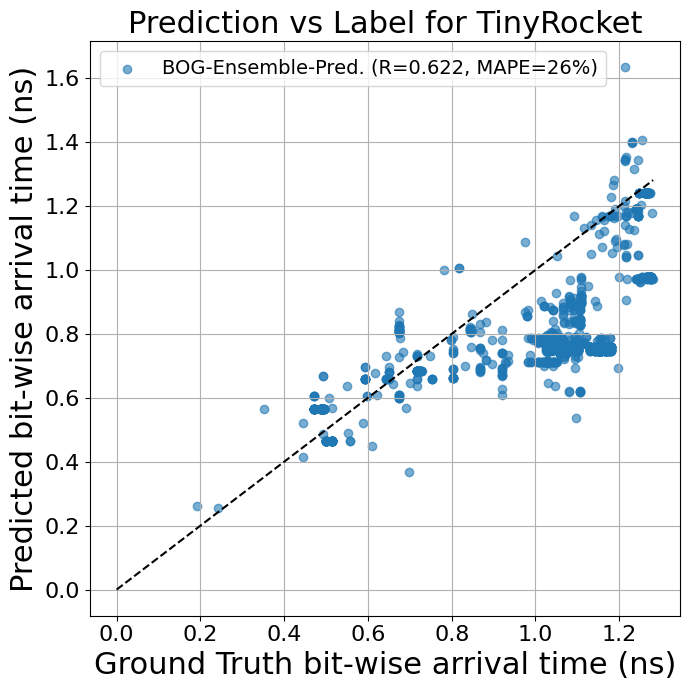

(1609, 26)
Testing ... SodorUCode
R:  0.842
MAPE:  12
RRSE:  0.712
MAE:  0.136


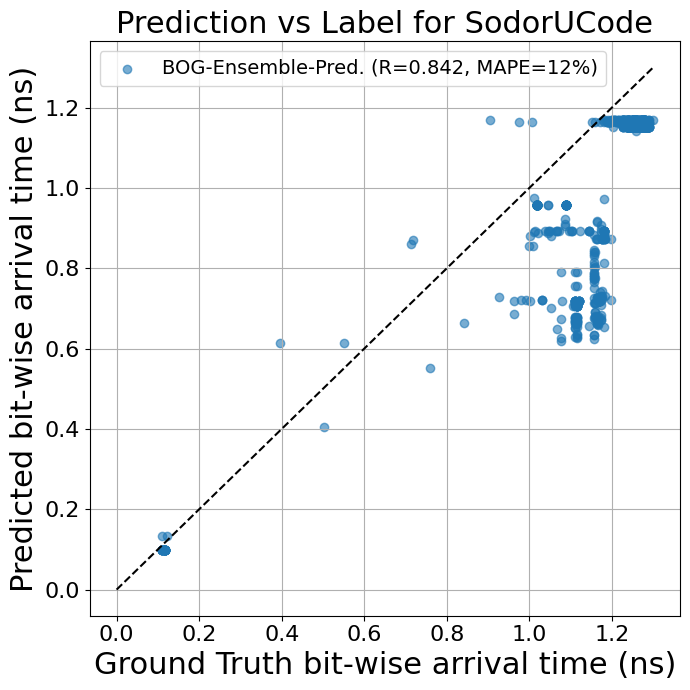

(23088, 26)
Testing ... SmallBoom
R:  0.866
MAPE:  13
RRSE:  0.508
MAE:  0.169


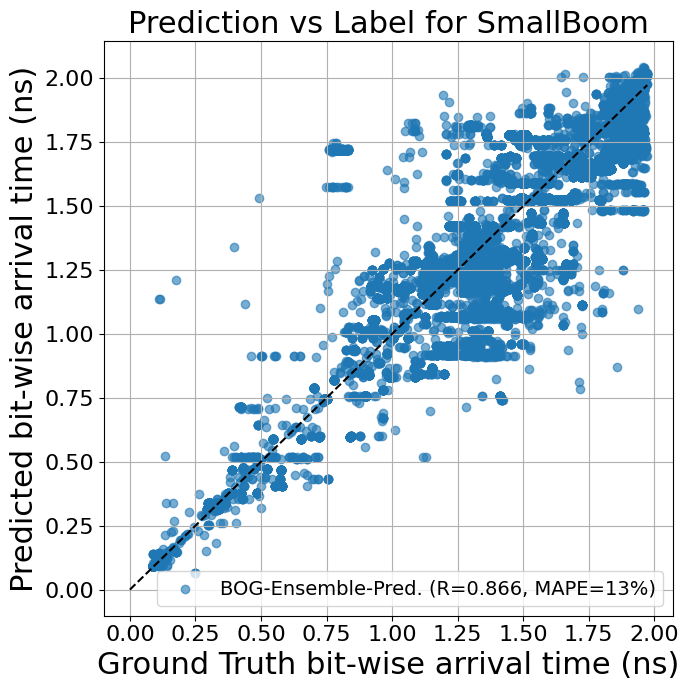

In [32]:
design_json = "/content/drive/MyDrive/modeling/regression_bit_ep/train_infer/design_js/design_lst.json"



def testing(test_lst):
    feat_label_dir = "/content/drive/MyDrive/modeling/feat_label/bit-wise"
    #graph_feat_dir = "/home/coguest5/RTL-Timer/modeling/feat_label/graph_feat"
    for design_name in test_lst:
        with open (f"{feat_label_dir}/{design_name}.pkl", "rb") as f:
            feat_label_pair = pickle.load(f)

        feat_dict, label_dict = feat_label_pair

        # print(feat_dict)
        # print(label_dict)

        feat_arr = np.array(list(feat_dict.values()))
        print(feat_arr.shape)
        label_arr = np.array(list(label_dict.values()))
        label_arr = label_arr[:,0]



        df_feat = pd.DataFrame(feat_arr)
        df_feat.drop(df_feat.columns[[25]], axis=1, inplace=True)

        save_path = f"/content/drive/MyDrive/modeling/regression_bit_ep/saved_model/bit_ep_model_{design_name}.pkl"
        print("Testing ...", design_name)
        with open (save_path, "rb") as f:
            xgbr = pickle.load(f)
        pred = xgbr.predict(df_feat)

        r, mape_val, rrse_val = regression_metrics(pred, label_arr)

        plt.figure(figsize=(7, 7))
        plt.scatter(label_arr, pred, alpha=0.6, label=f"BOG-Ensemble-Pred. (R={r}, MAPE={mape_val}%)")
        plt.plot([0, max(label_arr.max(),label_arr.max())], [0, max(label_arr.max(),label_arr.max())], 'k--')
        plt.xlabel("Ground Truth bit-wise arrival time (ns)", fontsize=22)
        plt.ylabel("Predicted bit-wise arrival time (ns)", fontsize=22)
        plt.title(f"Prediction vs Label for {design_name}", fontsize=22)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        plt.legend(fontsize=14)
        #plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()



def get_design_lst(bench):
    with open(design_json, 'r') as f:
        design_data = json.load(f)
        bench_data = design_data[bench]
    for k, v in bench_data.items():
        design_lst.append(k)



if __name__ == '__main__':
    bench_list_all = ['iscas','itc','opencores','VexRiscv','chipyard', 'riscvcores','NVDLA']

    design_name = 'TinyRocket'
    # design_name = ""

    global design_lst, phase
    design_lst = []
    phase = 'SYN'

    with open ("/content/drive/MyDrive/modeling/regression_bit_ep/train_infer/design_js/test_lst.json", "r") as f:
        test_lst = json.load(f)

    testing(test_lst)

# def run_xgb_label(x_train, y_train):

#     y_train = y_train.astype(float)
#     xgbr = xgb.XGBRegressor(n_estimators=500, max_depth=100, nthread=25)

#     xgbr.fit(x_train, y_train)

#     # y_pred = xgbr.predict(x_test)
#     # y_pred2 = xgbr.predict(x_train)
#     with open ("../saved_model/ep_model_sog.pkl", "wb") as f:
#         pickle.dump(xgbr, f)
